In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


In [2]:
theme = sns.set_style("whitegrid")

train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [3]:
display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Train dataset info:")
print(train_df.info())
print("\nTest dataset info:")
print(test_df.info())

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [5]:
display(train_df.describe(include="all"))
print("Missing values in train:")
print(train_df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Missing values in train:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


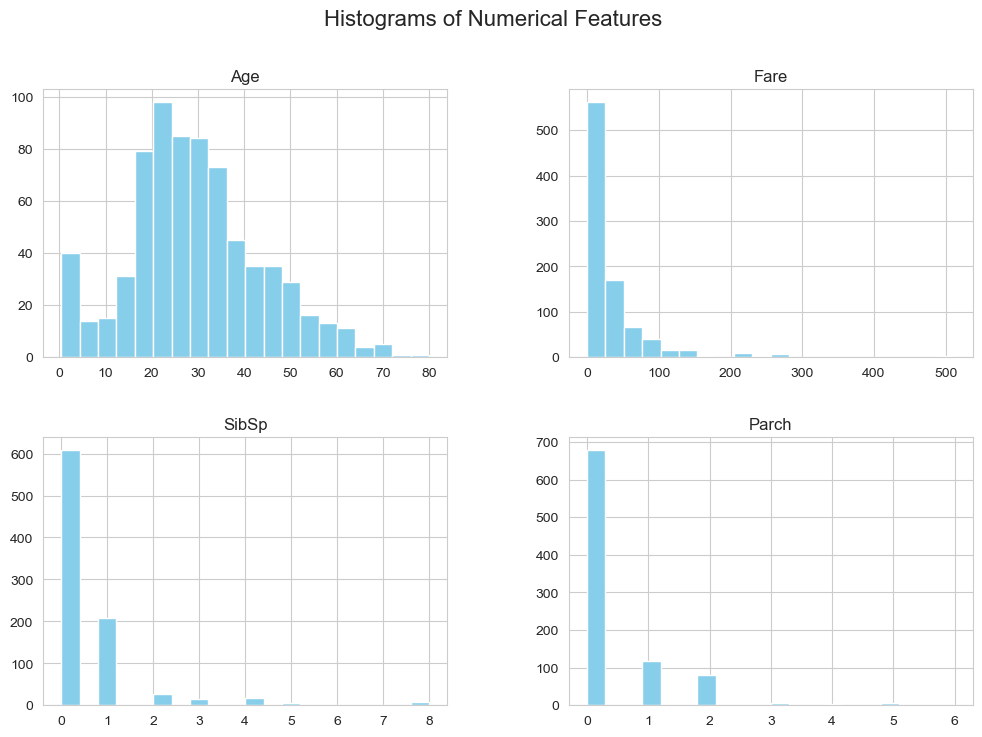

In [6]:
num_cols = ["Age", "Fare", "SibSp", "Parch"]
train_df[num_cols].hist(bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

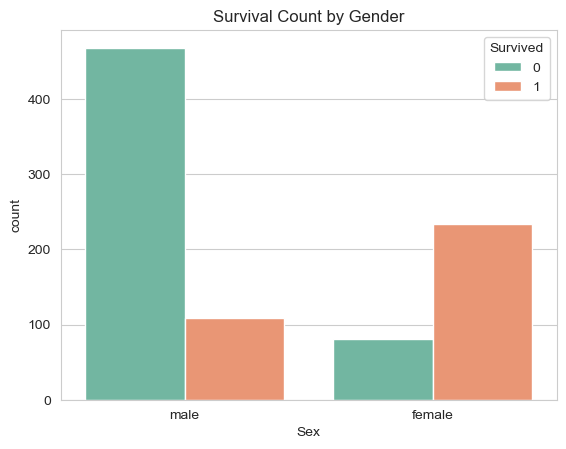

In [7]:
sns.countplot(data=train_df, x="Sex", hue="Survived", palette="Set2")
plt.title("Survival Count by Gender")
plt.show()

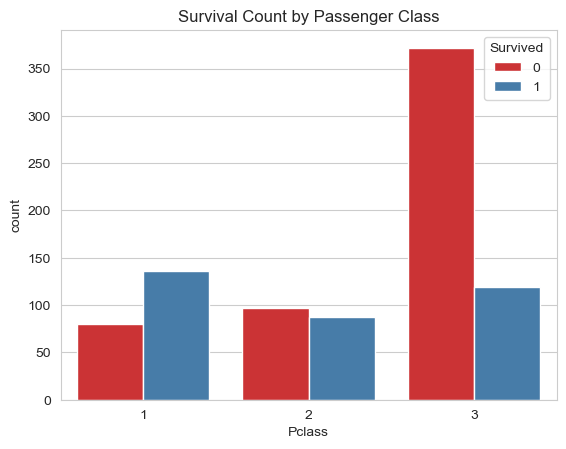

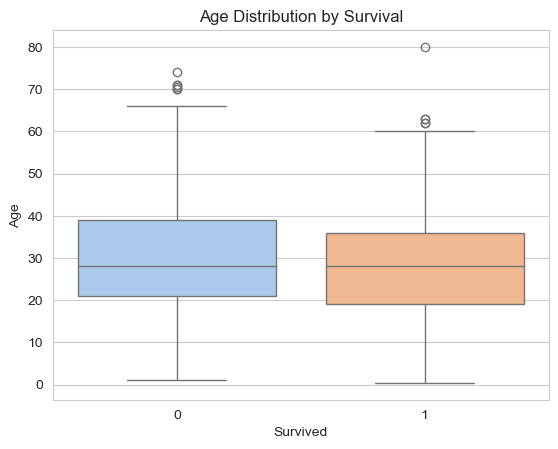

In [8]:
sns.countplot(data=train_df, x="Pclass", hue="Survived", palette="Set1")
plt.title("Survival Count by Passenger Class")
plt.show()

sns.boxplot(data=train_df, x="Survived", y="Age", palette="pastel")
plt.title("Age Distribution by Survival")
plt.show()

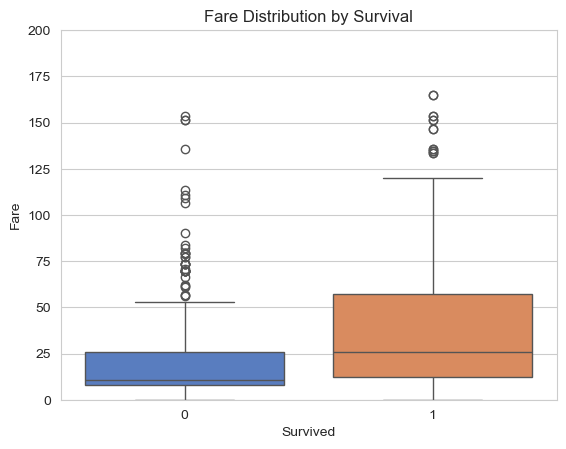

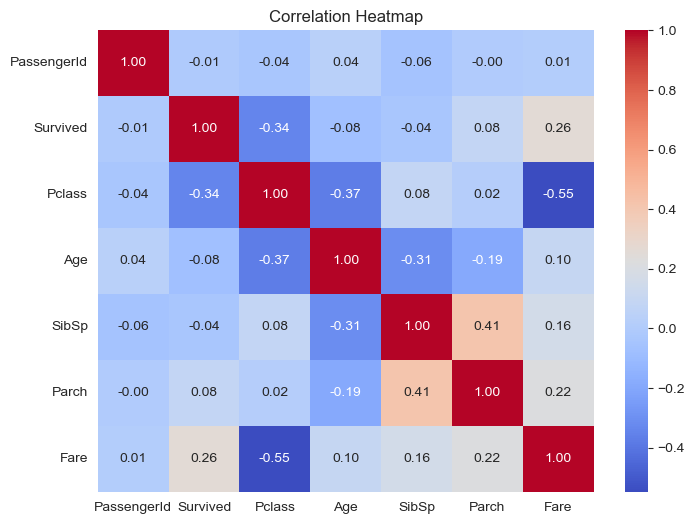

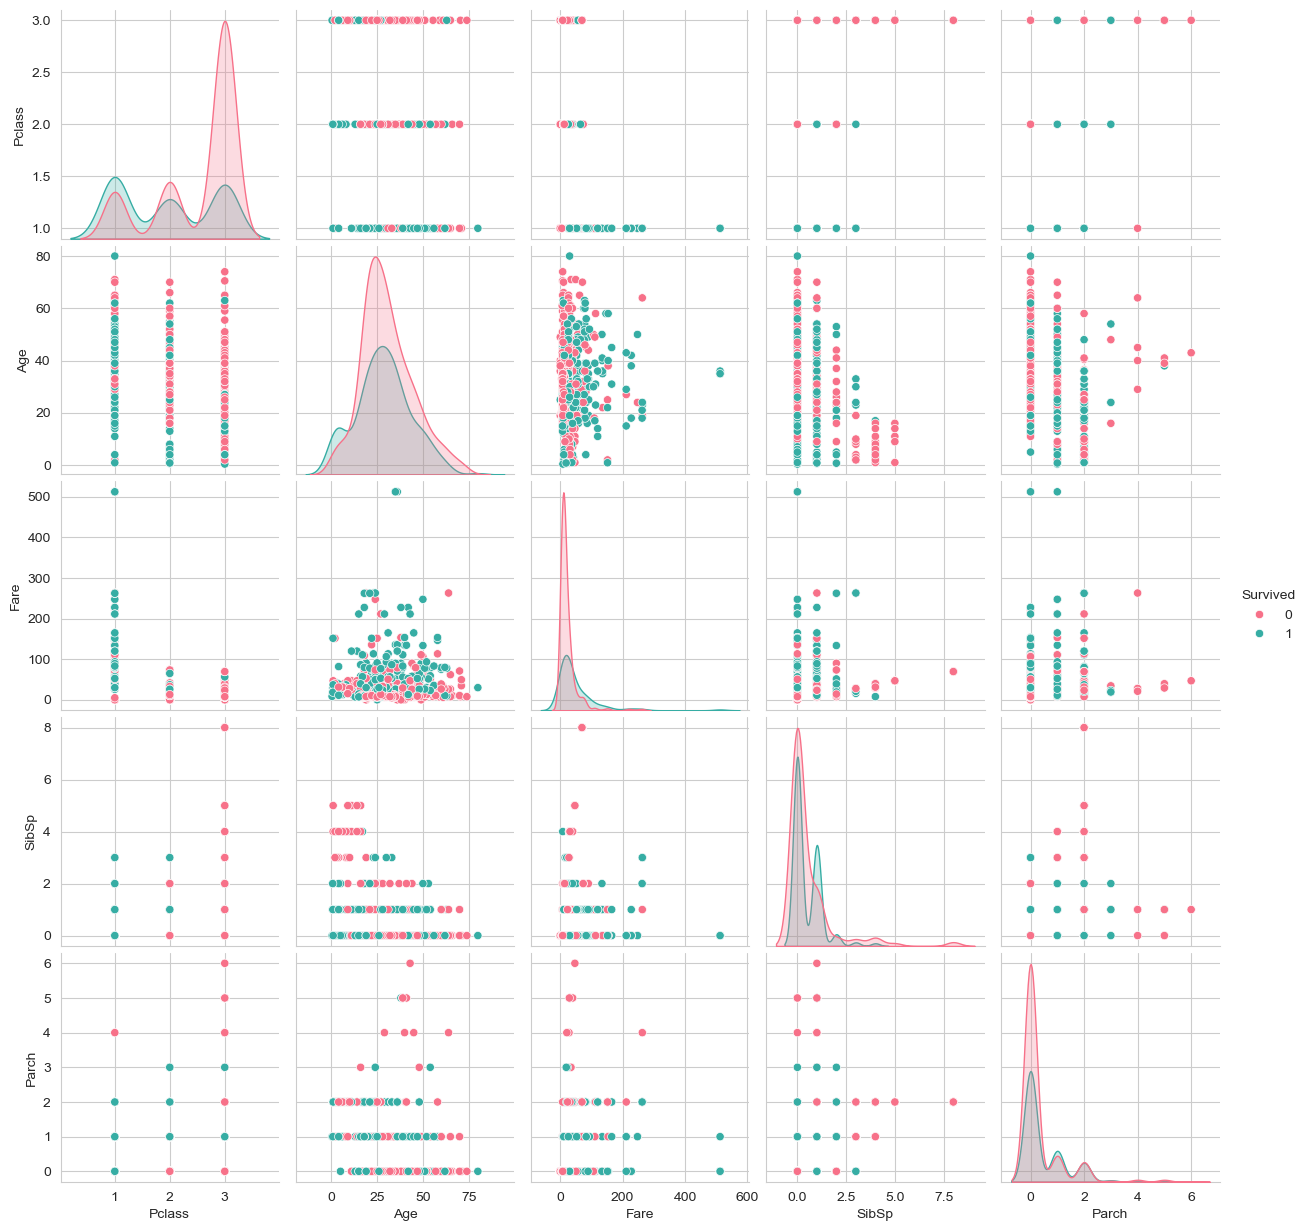

In [9]:
sns.boxplot(data=train_df, x="Survived", y="Fare", palette="muted")
plt.title("Fare Distribution by Survival")
plt.ylim(0, 200) 
plt.show()


# --- 9. Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



sns.pairplot(train_df[["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch"]], hue="Survived", palette="husl")
plt.show()

In [10]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

In [11]:
train_df["Fare"].fillna(train_df["Fare"].median(), inplace=True)
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [12]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
test_df["Embarked"].fillna(test_df["Embarked"].mode()[0], inplace=True)

In [13]:
train_df.drop(columns=["Cabin"], inplace=True)
test_df.drop(columns=["Cabin"], inplace=True)

In [14]:
label_enc = LabelEncoder()

train_df["Sex"] = label_enc.fit_transform(train_df["Sex"])
test_df["Sex"] = label_enc.transform(test_df["Sex"])

In [15]:
train_df["Embarked"] = label_enc.fit_transform(train_df["Embarked"])
test_df["Embarked"] = label_enc.transform(test_df["Embarked"])

In [16]:
train_df.drop(columns=["Name", "Ticket"], inplace=True)
test_df.drop(columns=["Name", "Ticket"], inplace=True)

In [17]:
print("Remaining missing values in train:")
print(train_df.isnull().sum())
print("\nRemaining missing values in test:")
print(test_df.isnull().sum())


display(train_df.head())
display(test_df.head())

Remaining missing values in train:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Remaining missing values in test:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [18]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())


In [19]:
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])


In [20]:
cols_to_drop = ["Name", "Ticket"]
train_df.drop(columns=[c for c in cols_to_drop if c in train_df.columns], inplace=True)
test_df.drop(columns=[c for c in cols_to_drop if c in test_df.columns], inplace=True)


In [21]:
train_df.drop(columns=["Name", "Ticket"], inplace=True, errors="ignore")
test_df.drop(columns=["Name", "Ticket"], inplace=True, errors="ignore")


In [22]:
print("Remaining missing values in train:")
print(train_df.isnull().sum())
print("\nRemaining missing values in test:")
print(test_df.isnull().sum())


display(train_df.head())
display(test_df.head())

Remaining missing values in train:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Remaining missing values in test:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [23]:
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
y_pred = log_reg.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [26]:
X = train_df.drop(columns=["Survived", "PassengerId"])
y = train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


# Predictions
y_pred = log_reg.predict(X_val)
y_pred_proba = log_reg.predict_proba(X_val)[:, 1]

In [28]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_val, y_pred_proba))

Accuracy: 0.8044692737430168

Confusion Matrix:
 [[98 12]
 [23 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC-AUC Score: 0.8523056653491438


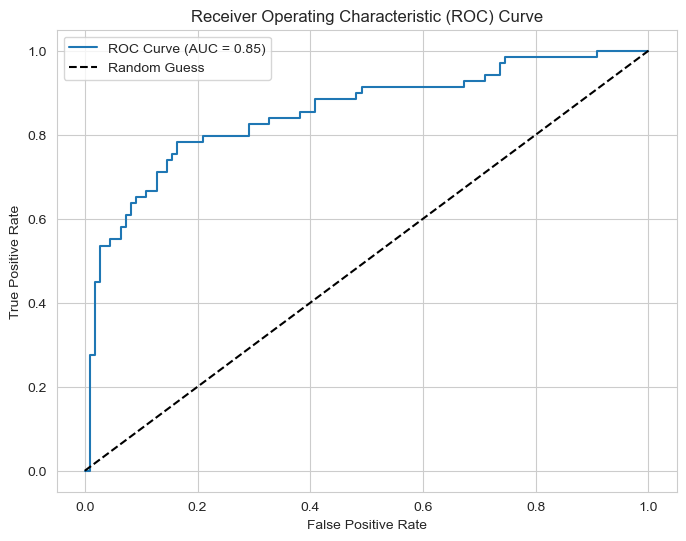

In [29]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


Logistic Regression Coefficients:


,Feature,Coefficient
5,Fare,0.002199
2,Age,-0.038022
4,Parch,-0.086772
6,Embarked,-0.230824
3,SibSp,-0.246999
0,Pclass,-1.046840
1,Sex,-2.590506


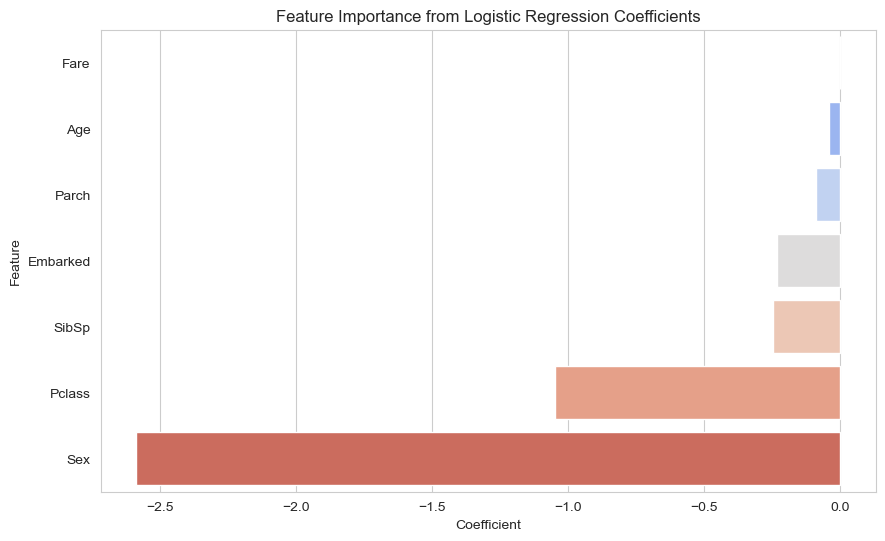

In [30]:
coefficients = pd.DataFrame({
"Feature": X.columns,
"Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)


print("\nLogistic Regression Coefficients:")
display(coefficients)

plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette="coolwarm")
plt.title("Feature Importance from Logistic Regression Coefficients")
plt.show()

In [31]:
import joblib
joblib.dump(log_reg, "titanic_log_reg.pkl")


['titanic_log_reg.pkl']

In [32]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

In [33]:
model = joblib.load("titanic_log_reg.pkl")

st.title("Titanic Survival Prediction App")
st.write("Enter passenger details to predict survival probability.")

2025-10-04 20:38:56.359 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.945 
  command:

    streamlit run C:\Users\chandu\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-04 20:38:56.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [34]:
pclass = st.selectbox("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.slider("Age", 0, 80, 25)
sibsp = st.number_input("Number of Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Number of Parents/Children Aboard", 0, 10, 0)
fare = st.slider("Fare", 0.0, 500.0, 30.0)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

2025-10-04 20:38:56.985 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.991 Session state does not function when running a script without `streamlit run`
2025-10-04 20:38:56.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:56.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38

In [35]:
sex_encoded = 1 if sex == "male" else 0
embarked_map = {"C": 0, "Q": 1, "S": 2}
embarked_encoded = embarked_map[embarked]

input_data = pd.DataFrame({
    "Pclass": [pclass],
    "Sex": [sex_encoded],
    "Age": [age],
    "SibSp": [sibsp],
    "Parch": [parch],
    "Fare": [fare],
    "Embarked": [embarked_encoded]
})

In [36]:
if st.button("Predict Survival"):
    prediction = model.predict(input_data)[0]
    probability = model.predict_proba(input_data)[0][1]

    st.subheader("Prediction Result:")
    st.write(f"**Survived:** {'Yes' if prediction == 1 else 'No'}")
    st.write(f"**Survival Probability:** {probability:.2%}")

2025-10-04 20:38:58.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:58.434 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:58.435 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:58.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:38:58.437 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

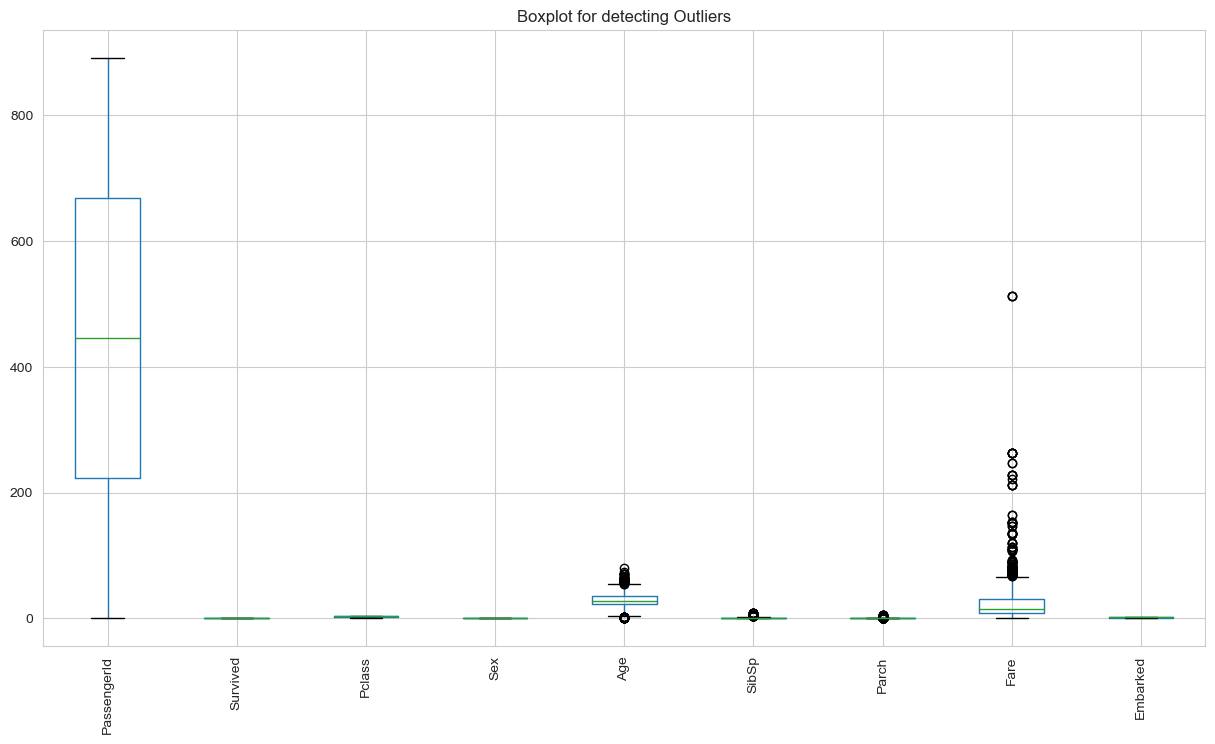

In [41]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 8))
train_df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot for detecting Outliers")
plt.show()

In [42]:
def treat_outliers_iqr(train_df, columns):
    for col in columns:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train_df[col] = np.where(train_df[col] < lower_bound, lower_bound, train_df[col])
        train_df[col] = np.where(train_df[col] > upper_bound, upper_bound, train_df[col])
    return train_df

In [43]:
train_df= treat_outliers_iqr(train_df, numeric_cols)
print("Outlier treatment completed.")

Outlier treatment completed.


In [44]:
import pickle

with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'logistic_model.pkl'")

Model saved successfully as 'logistic_model.pkl'


In [45]:
import streamlit as st
import pickle
import numpy as np


In [46]:
model = pickle.load(open('logistic_model.pkl', 'rb'))

In [47]:
st.title("Logistic Regression Prediction App")
st.write("This app predicts outcomes using a trained logistic regression model.")

2025-10-04 20:50:48.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:50:48.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:50:48.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:50:48.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [48]:
st.header("Enter Input Features:")


feature1 = st.number_input("Feature 1")
feature2 = st.number_input("Feature 2")
feature3 = st.number_input("Feature 3")
feature4 = st.number_input("Feature 4")

2025-10-04 20:51:14.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.507 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.509 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.510 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:14.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
if st.button("Predict"):
    input_data = np.array([[feature1, feature2, feature3, feature4]])
    prediction = model.predict(input_data)
    st.success(f"Predicted Class: {prediction[0]}")

2025-10-04 20:51:40.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:40.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:40.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:40.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-04 20:51:40.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Precision and recall are two important evaluation metrics in classification tasks. Precision measures the proportion of correctly predicted positive cases out of all cases predicted as positive, focusing on the accuracy of positive predictions. For example, in spam detection, precision ensures that emails marked as spam are indeed spam. Recall, on the other hand, measures the proportion of actual positive cases that were correctly identified, focusing on how well the model captures all positives. In medical diagnosis, recall is crucial to ensure that patients with a disease are correctly identified. In short, precision is about the quality of positive predictions, while recall is about their completeness.

Cross-validation is a resampling technique used to assess the generalization performance of machine learning models. In k-fold cross-validation, the dataset is divided into k folds, and the model is trained on k–1 folds and tested on the remaining one. This process repeats k times, and the average result gives a more reliable performance estimate than a single train-test split. In binary classification, cross-validation is particularly important because it prevents overfitting, ensures the model generalizes to unseen data, and provides balanced evaluation, especially in imbalanced datasets where stratified cross-validation maintains class proportions across folds.

Logistic regression is one of the most widely used algorithms for binary classification, and it is often discussed in interviews. Common interview questions include conceptual ones such as: what is logistic regression and how does it differ from linear regression, why the sigmoid function is used, how coefficients are interpreted, and why the log loss function is preferred over mean squared error

Application-oriented questions often focus on how logistic regression can be applied to real-world problems such as predicting survival on the Titanic dataset, handling categorical variables like “Sex” or “Embarked,” dealing with imbalanced data, and evaluating performance using metrics such as precision, recall, F1-score, and ROC-AUC. Scenario-based questions may include deciding classification thresholds when probabilities are output, extending logistic regression to multi-class problems, handling missing data such as “Age” in the Titanic dataset, improving model performance through feature engineering or regularization, and comparing logistic regression with decision trees in terms of interpretability and performance. These interview-style questions highlight both the theoretical foundations and practical applications of logistic regression, making it an essential topic for data science and machine learning interviews.